# 1. Importation des Librairies 

In [7]:
# importer les Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pour installer Tensorflow : pip install tensorflow  / conda install tensorflow
# Pour installer keras : pip install keras / conda install keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

# 2. charger les donnees

In [8]:
data = pd.read_csv('Data/DDoS_dataset.csv')
data.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


# 3. analyse de donnees

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [10]:
data['src'].unique()

array(['10.0.0.1', '10.0.0.2', '10.0.0.4', '10.0.0.10', '10.0.0.3',
       '10.0.0.5', '10.0.0.13', '10.0.0.6', '10.0.0.20', '10.0.0.11',
       '10.0.0.12', '10.0.0.18', '10.0.0.8', '10.0.0.7', '10.0.0.9',
       '10.0.0.14', '10.0.0.15', '10.0.0.16', '10.0.0.17'], dtype=object)

In [11]:
data['dst'].unique()

array(['10.0.0.8', '10.0.0.7', '10.0.0.3', '10.0.0.5', '10.0.0.10',
       '10.0.0.13', '10.0.0.1', '10.0.0.11', '10.0.0.2', '10.0.0.4',
       '10.0.0.9', '10.0.0.6', '10.0.0.14', '10.0.0.15', '10.0.0.12',
       '10.0.0.16', '10.0.0.17', '10.0.0.18'], dtype=object)

In [12]:
data['Protocol'].unique()

array(['UDP', 'TCP', 'ICMP'], dtype=object)

In [13]:
data.drop(columns='src', inplace=True, axis=1)
data.drop(columns='dst', inplace=True, axis=1)
data.head()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


# 4. pretraitement

In [14]:
encoder = LabelEncoder()

In [15]:
data['Protocol'] = encoder.fit_transform(data['Protocol'])
data.head()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,451,0,2,3,143928631,3917,0,0.0,0.0,0
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,451,0,2,4,3842,3520,0,0.0,0.0,0
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,2,1,3795,1242,0,0.0,0.0,0
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,2,2,3688,1492,0,0.0,0.0,0
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,2,3,3413,3665,0,0.0,0.0,0


In [16]:
data['Protocol'].unique()

array([2, 1, 0])

In [17]:
data.isnull().sum()

dt               0
switch           0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [18]:
#import seaborn as sns

In [19]:
#sns.heatmap(data.isnull())

In [20]:
# Gestion des valeurs manquantes
data['rx_kbps'].fillna(data['rx_kbps'].mean(), inplace=True)
data['tot_kbps'].fillna(data['tot_kbps'].mean(), inplace=True)
data.isnull().sum()

dt             0
switch         0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64

# 5. diviser les donnees train et test 

In [21]:
data.columns

Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'Protocol', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps',
       'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

In [22]:
#X = data.drop(columns='label', inplace=True, axis=1)
#y = data['label']
X = data.iloc[ : , :-1]
y = data.iloc[ : , -1]

In [23]:
X

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,2,3,143928631,3917,0,0.0,0.0
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046,451,0,2,4,3842,3520,0,0.0,0.0
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,2,1,3795,1242,0,0.0,0.0
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,2,2,3688,1492,0,0.0,0.0
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,2,3,3413,3665,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,0,1,15209,12720,1,1.0,2.0
104341,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,0,3,15099,14693,1,1.0,2.0
104342,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,0,2,3409,3731,0,0.0,0.0
104343,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,0,1,15209,12720,1,1.0,2.0


In [24]:
y

0         0
1         0
2         0
3         0
4         0
         ..
104340    0
104341    0
104342    0
104343    0
104344    0
Name: label, Length: 104345, dtype: int64

In [25]:
# Splitting 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=40)

In [27]:
print("X-train:", X_train.shape)
print("X-test:", X_test.shape)
print("y-train:", y_train.shape)
print("y-train:", y_test.shape)

X-train: (80345, 20)
X-test: (24000, 20)
y-train: (80345,)
y-train: (24000,)


In [28]:
X_train

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps
10499,11395,4,69567,72488814,220,746000000,2.210000e+11,8,1943,9343,9735406,311,0,2,3,3413,3665,0,0.0,0.0
31334,3309,6,93278,99434348,207,245000000,2.070000e+11,4,7916,13523,14415518,450,0,2,4,5130,435554822,0,6437.0,6437.0
101105,6792,10,118,11564,121,447000000,1.210000e+11,3,3443,30,2940,1,0,0,2,5631,1632,0,0.0,0.0
3267,9876,2,64567,68828422,143,113000000,1.430000e+11,3,1910,13526,14418716,450,0,2,2,3582,1332,0,0.0,0.0
62307,29262,1,253,24794,260,81000000,2.600000e+11,4,1057,29,2842,0,1,0,3,30555,156001367,0,4972.0,4972.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56760,33273,1,798,78204,818,585000000,8.190000e+11,7,2936,29,2842,0,1,0,3,135645374,185738,2,2.0,4.0
93176,25170,7,12,1176,12,985000000,1.298500e+10,9,3021,0,0,0,1,0,3,135554738,135206780,1,1.0,2.0
80037,14615,4,85836,4635144,151,19000000,1.510000e+11,5,7385,17630,952020,587,1,1,3,150569319,8893180,3958,301.0,4259.0
30727,2829,6,98554,102693268,347,439000000,3.470000e+11,2,4440,9168,9553056,305,0,2,4,4449,245260547,0,2529.0,2529.0


In [29]:
y

0         0
1         0
2         0
3         0
4         0
         ..
104340    0
104341    0
104342    0
104343    0
104344    0
Name: label, Length: 104345, dtype: int64

In [30]:
# Standardiser les features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
#X_train

# 6. Construire le Shallow Neural Network

In [33]:
# Creation du modele
model = Sequential()

In [34]:
# Ajout de la couche d'entree == couche cachee
model.add(Dense(10, input_shape=(20,), activation='relu'))
#model.add(Dense(16, input_shape=(9,), activation='relu'))
#model.add(Dense(32, activation='relu'))

# Ajout de la couche de sortie
model.add(Dense(1, activation='sigmoid'))

# Compiler le modele
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Affichage de l'architecture ou la structure du modele
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Entrainer le modele
history = model.fit(X_train, y_train, epochs=150, verbose=1, validation_data=(X_test, y_test))

Epoch 1/150
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8025 - loss: 0.4112 - val_accuracy: 0.9399 - val_loss: 0.1764
Epoch 2/150
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9441 - loss: 0.1623 - val_accuracy: 0.9494 - val_loss: 0.1412
Epoch 3/150
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9511 - loss: 0.1312 - val_accuracy: 0.9559 - val_loss: 0.1231
Epoch 4/150
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9575 - loss: 0.1151 - val_accuracy: 0.9582 - val_loss: 0.1150
Epoch 5/150
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9581 - loss: 0.1100 - val_accuracy: 0.9605 - val_loss: 0.1065
Epoch 6/150
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9603 - loss: 0.1018 - val_accuracy: 0.9617 - val_loss: 0.1019
Epoch 7/150
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9618 - loss: 0.0979 - val_accuracy: 0.9623 - val_loss: 0.0976
Epoch 8/150
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9627 -

# 7. Visualiser l’évolution de l’entrainement du réseau de neurone

In [36]:
history

In [37]:
# Visualiser l’évolution de l’entrainement du réseau de neurone
import matplotlib.pyplot as plt

In [38]:
epoch_accuracy = history.history['accuracy']
epoch_loss = history.history['loss']

epoch_val_accuracy = history.history['val_accuracy']
epoch_val_loss = history.history['val_loss']

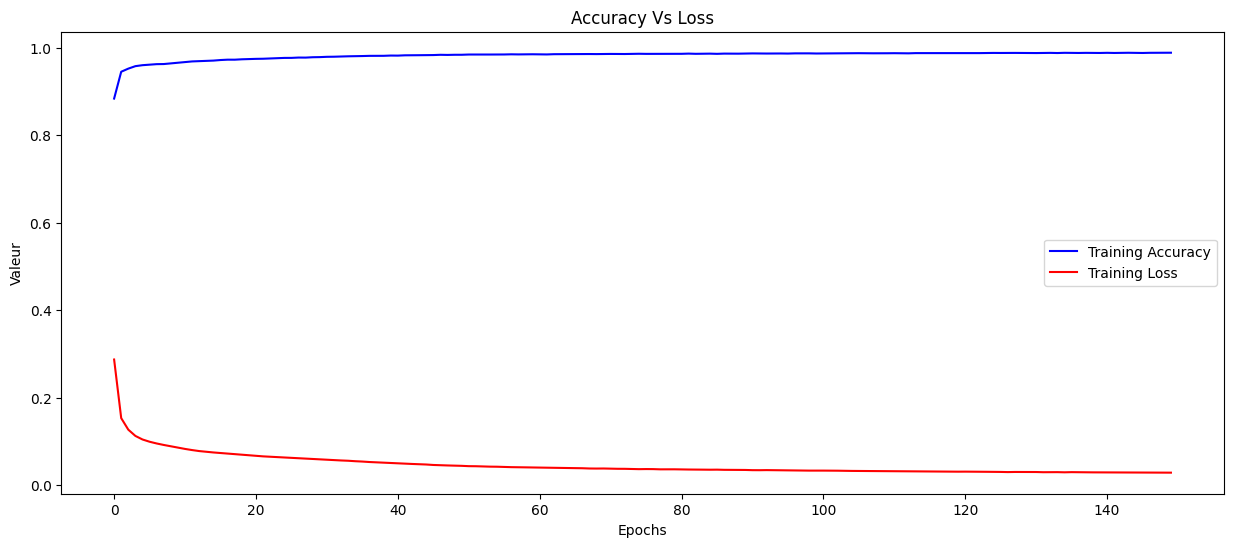

In [39]:
plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='red', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Valeur')
plt.title('Accuracy Vs Loss')
plt.legend()
plt.plot()
plt.show()

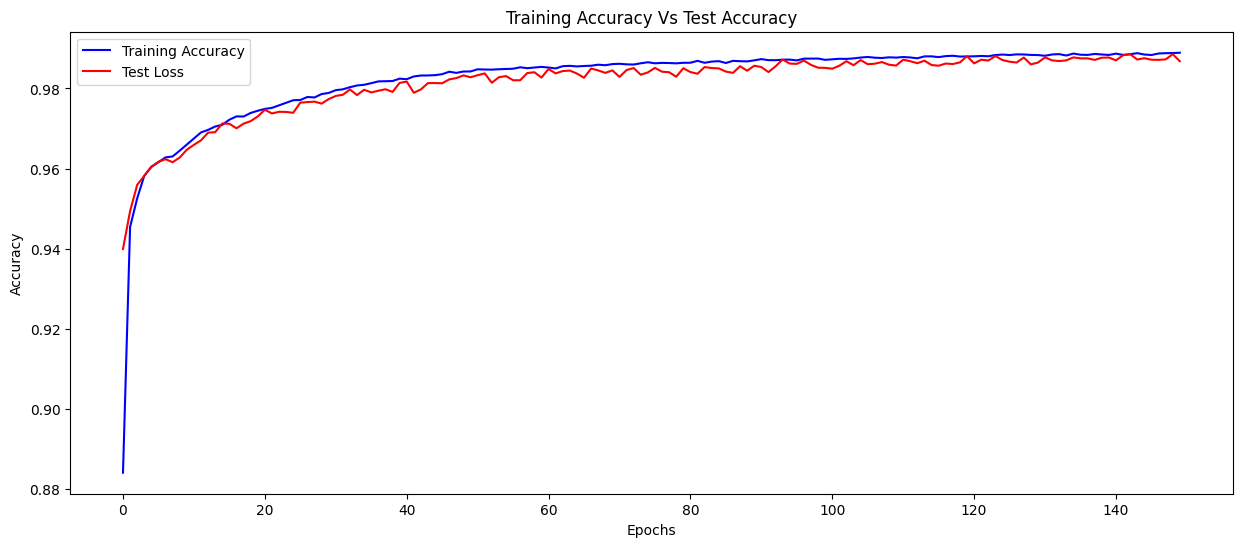

In [40]:
plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Vs Test Accuracy')
plt.legend()
plt.plot()
plt.show()

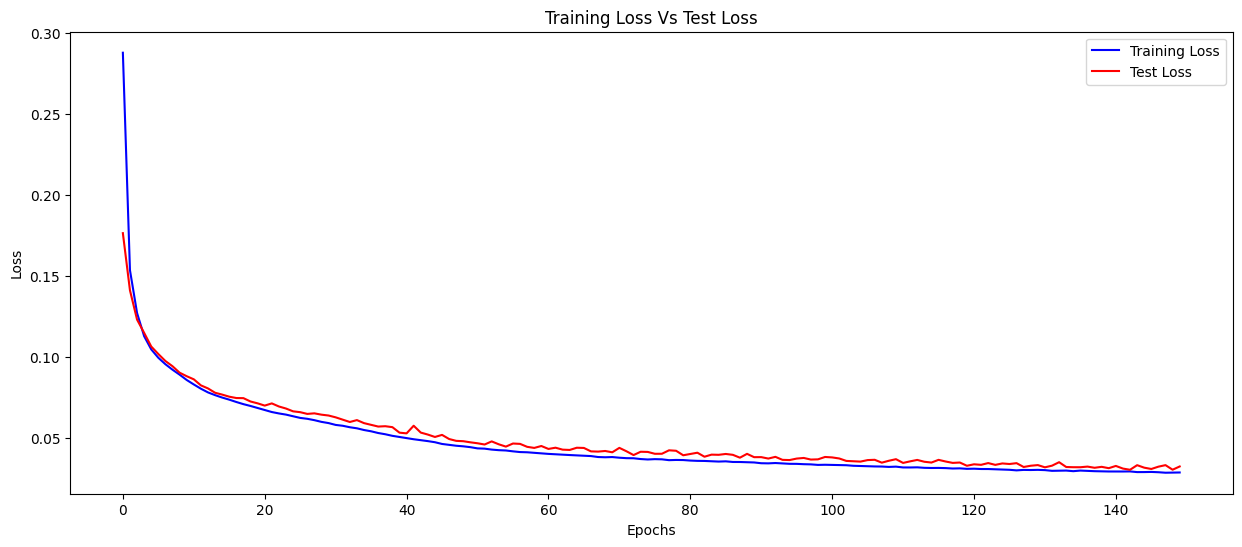

In [41]:
plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='blue', label='Training Loss')
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Vs Test Loss')
plt.legend()
plt.plot()
plt.show()

# 8. Evaluer le modèle

In [42]:
model.evaluate(X_test, y_test)

750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9875 - loss: 0.0303


[0.032625820487737656, 0.9867916703224182]

# deep learning model

In [43]:
model_dnn = Sequential()

In [44]:
opt = 'adam'

In [45]:
# 1ere couche
model_dnn.add(Dense(32,input_shape=(20,), activation='relu'))


# 2eme couche
model_dnn.add(Dense(32, activation='relu'))
model_dnn.add(Dense(64, activation='relu'))
model_dnn.add(Dense(128, activation='relu'))
model_dnn.add(Dense(32, activation='relu'))

# la couche de sortie
model_dnn.add(Dense(1,activation='sigmoid'))

# compliler le modele
model_dnn.compile(optimizer=opt, loss='binary_crossentroy',metrics=['accuracy'])

model_dnn.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,321 (63.75 KB)

 Trainable params: 16,321 (63.75 KB)

 Non-trainable params: 0 (0.00 B)